# Import Kaggle and get Dataset

In [9]:
! pip install kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c playground-series-s4e1

 59% 4.00M/6.81M [00:00<00:00, 5.94MB/s]
100% 6.81M/6.81M [00:01<00:00, 6.73MB/s]


In [13]:
!unzip -qq "/content/playground-series-s4e1.zip"

In [7]:
import numpy as np
import pandas as pd

In [14]:
train= pd.read_csv('train.csv')
train2= pd.read_csv('train.csv')
train3= pd.read_csv('train.csv')

test = pd.read_csv('test.csv')
test2 = pd.read_csv('test.csv')
test3 = pd.read_csv('test.csv')

#Read Dataset

In [ ]:
train.drop(['id','CustomerId','Surname'], axis=1, inplace=True)
train2.drop(['id','CustomerId','Surname','Gender'], axis=1, inplace=True)

In [ ]:
test.drop(columns=["CustomerId","Surname"],inplace=True)
test2.drop(columns=["CustomerId","Surname","Gender"],inplace=True)

In [ ]:
test_features = test.drop('id', axis=1)
test_features2 = test2.drop('id', axis=1)

In [ ]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train.info()   # know info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


-------------------------------------------------
Note that there is 165034 data record and  11 column (attributes or feature)

Have 5 float , 4 int and 2 strings or objects

There not have missing data

In [ ]:
train.isna().apply(pd.value_counts)  # check Null values

<ipython-input-25-d89f53ab00ae>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  train.isna().apply(pd.value_counts)  # check Null values


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
False,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034,165034


no missing data

In [ ]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
train[train.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
210,507,France,Female,29.0,6,89349.47,2,0.0,0.0,180626.68,0
1866,621,France,Male,43.0,1,0.00,2,1.0,0.0,47578.45,0
2073,794,France,Male,45.0,8,88656.37,2,1.0,0.0,116547.31,0
3139,590,Spain,Male,43.0,8,0.00,2,1.0,1.0,143628.31,0
3308,720,Germany,Female,43.0,10,110822.90,1,0.0,0.0,72861.94,1
...,...,...,...,...,...,...,...,...,...,...,...
163101,749,France,Male,49.0,1,139290.41,1,1.0,0.0,182855.42,0
163785,589,Spain,Male,45.0,1,0.00,2,0.0,0.0,125939.22,0
164350,614,Spain,Male,66.0,2,0.00,2,1.0,1.0,180082.70,0
164596,682,France,Male,37.0,5,0.00,2,1.0,1.0,112554.68,0


In [ ]:
# remove duplicate

train.drop_duplicates(inplace=True)
train2.drop_duplicates(inplace=True)
train3.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test2.drop_duplicates(inplace=True)
test3.drop_duplicates(inplace=True)

In [ ]:
train[train.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**No** Duplicate

# Data exploration and visualization.

##Pie Chart

<ipython-input-31-02a4eb4d3fd3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=train, palette=colors, ax=axes[1], edgecolor='black', linewidth=1.5)  # Custom palette for different colors


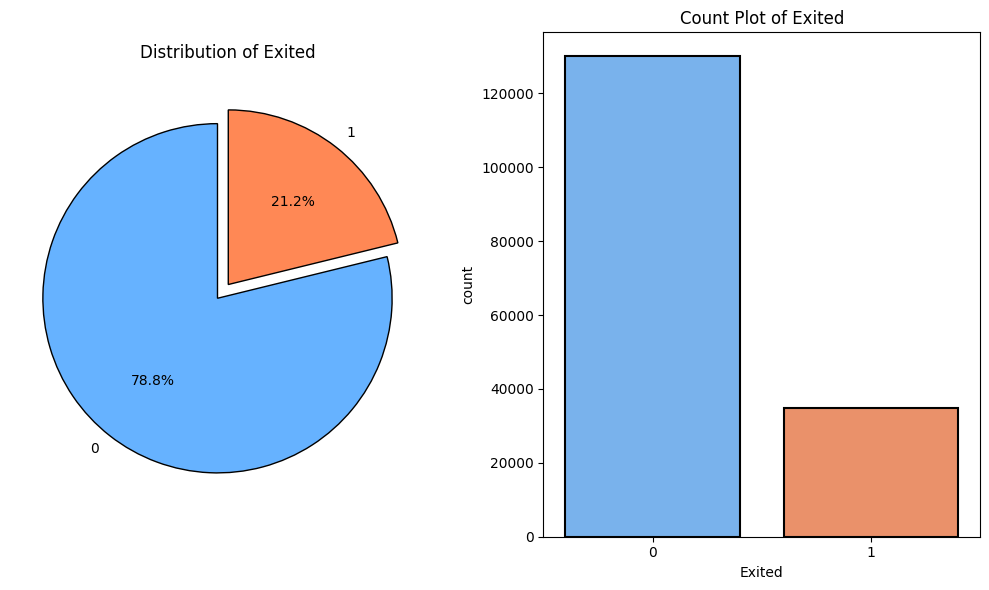

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Pie chart for 'Exited' column
status_counts = train['Exited'].value_counts()
colors = ['#66B2FF', '#FF8855']  # Different colors for each status
explode = (0.1, 0)  # Explode first slice
wedgeprops = {'edgecolor': 'black'}  # Black edges for slices
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=wedgeprops)
axes[0].set_title('Distribution of Exited')

# Count plot for 'Exited' column
sns.countplot(x='Exited', data=train, palette=colors, ax=axes[1], edgecolor='black', linewidth=1.5)  # Custom palette for different colors
axes[1].set_title('Count Plot of Exited')

plt.tight_layout()
plt.show()


21.2% is Exited and 78.8% is Non exited

# Histogram of numerical variables

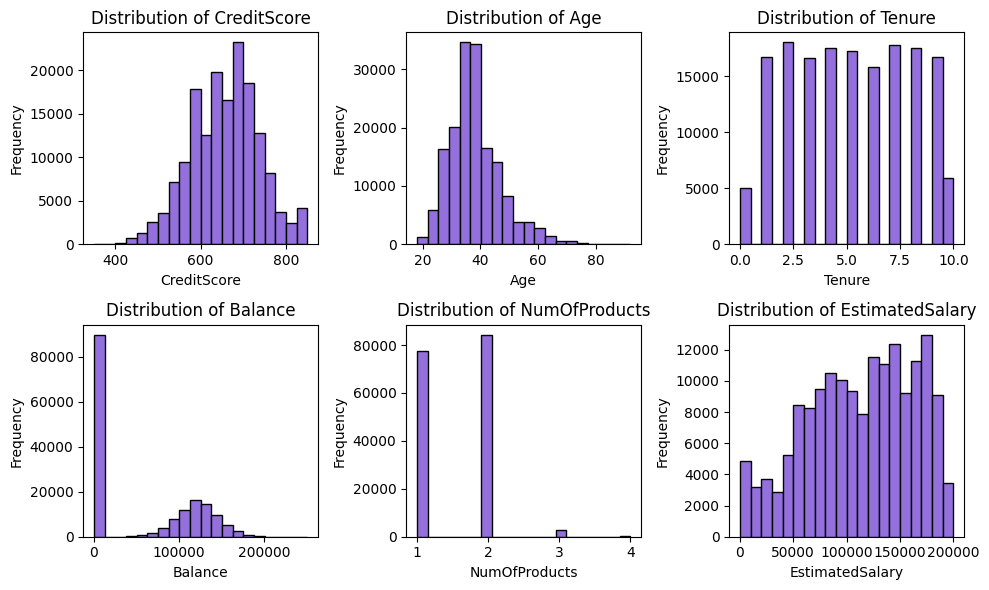

In [ ]:
numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(10, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    plt.hist(train[var], bins=20, color='MediumPurple', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This code provides a visual representation of the distribution of each numerical variable in the dataset using histograms, allowing for insights into their frequency distribution and range of values.


## pie chart for categorical variables


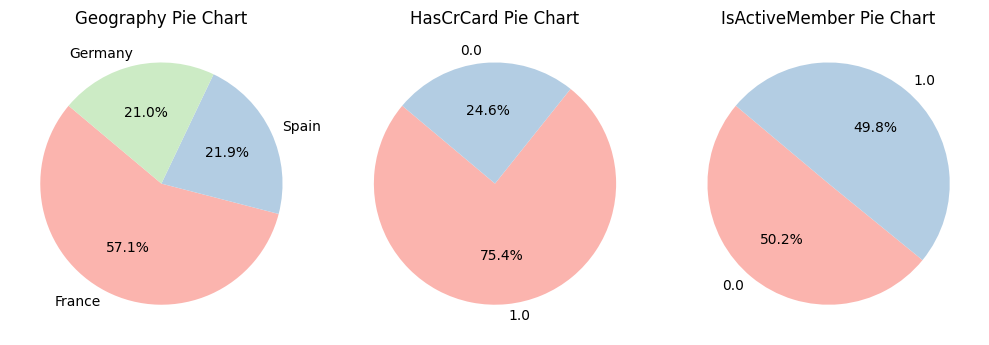

In [ ]:
categorical_vars = ['Geography', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(10, 6))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    counts = train[var].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
    plt.title(f'{var} Pie Chart')
plt.tight_layout()
plt.show()

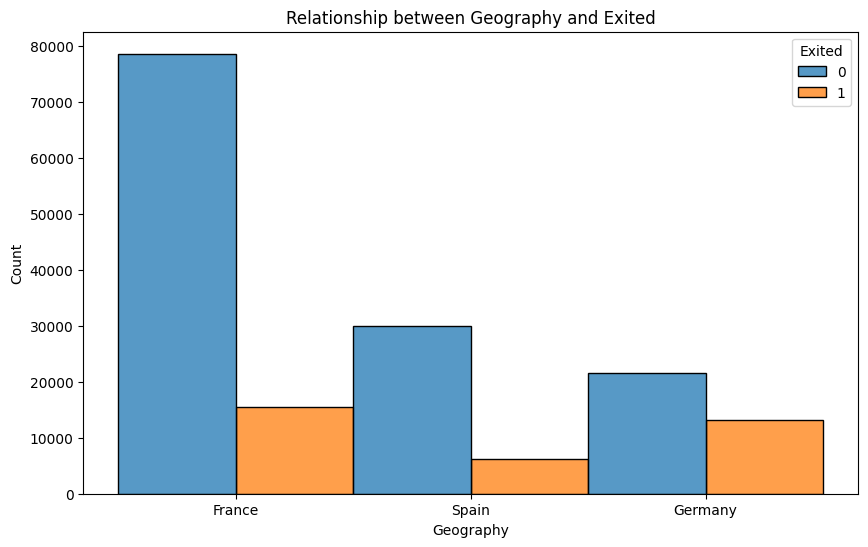

In [ ]:

# Create a histogram showing the relationship between Geography and Exited
plt.figure(figsize=(10, 6))
sns.histplot(x='Geography', hue='Exited', data=train, multiple='dodge')
plt.title('Relationship between Geography and Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

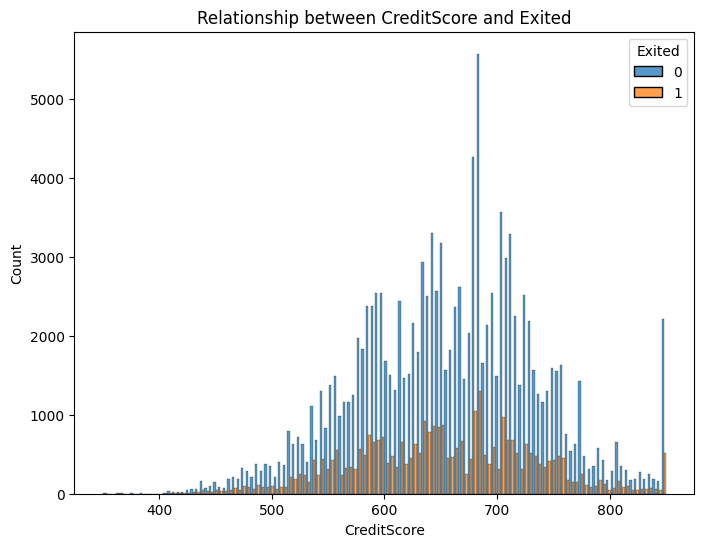

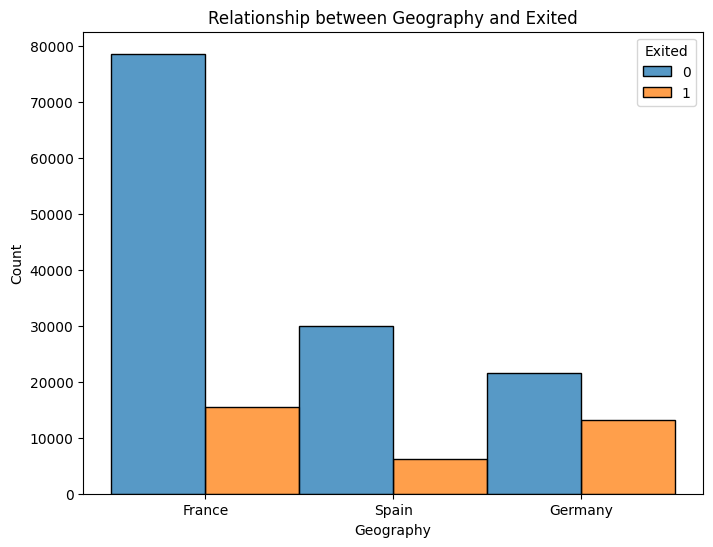

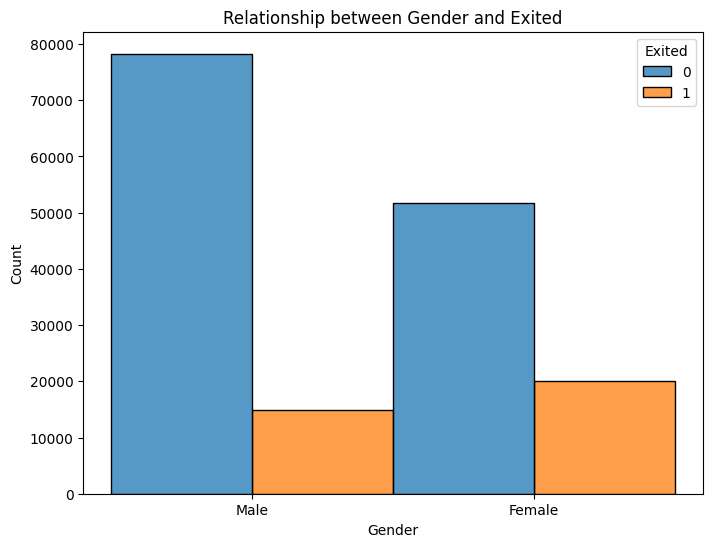

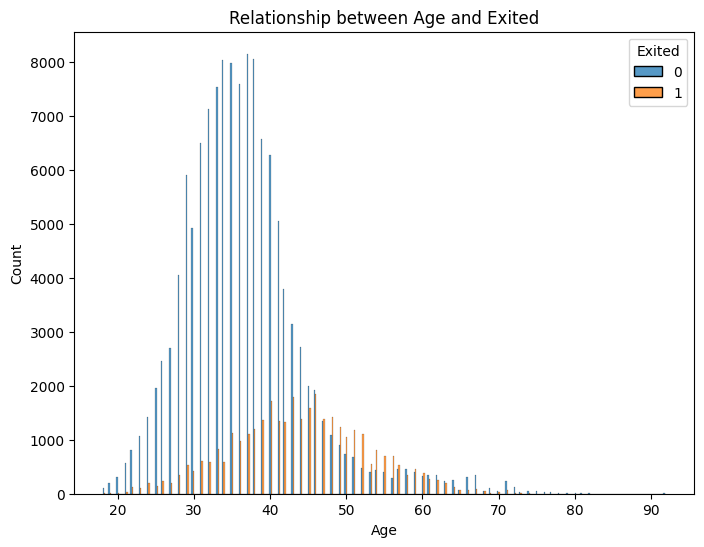

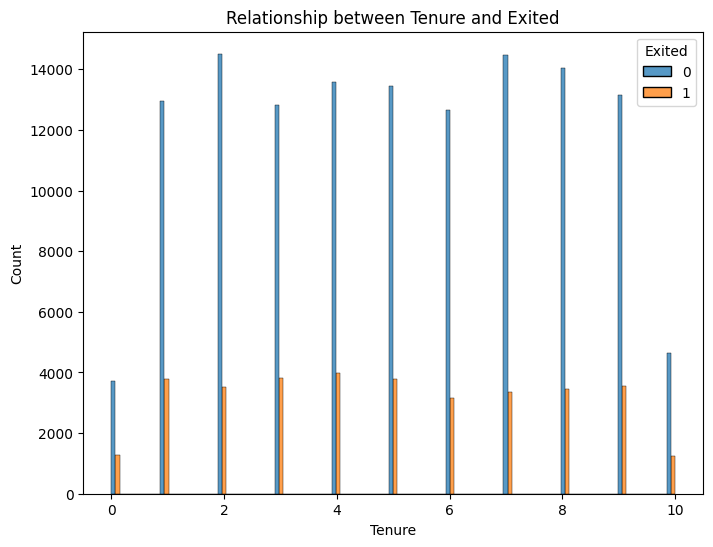

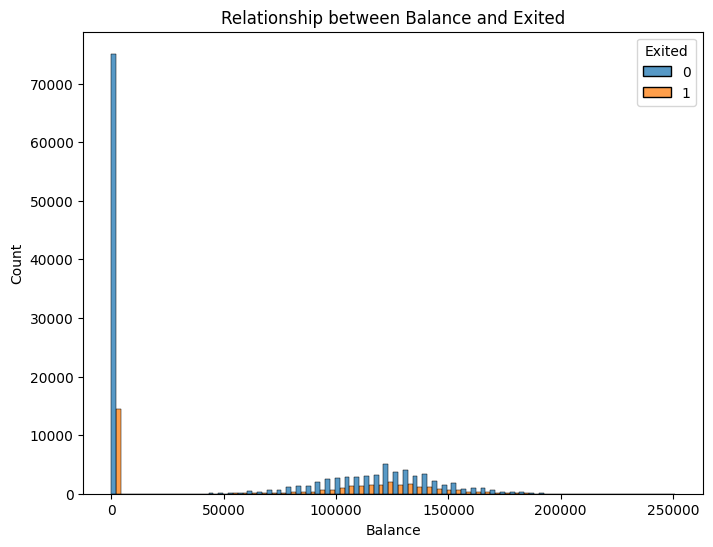

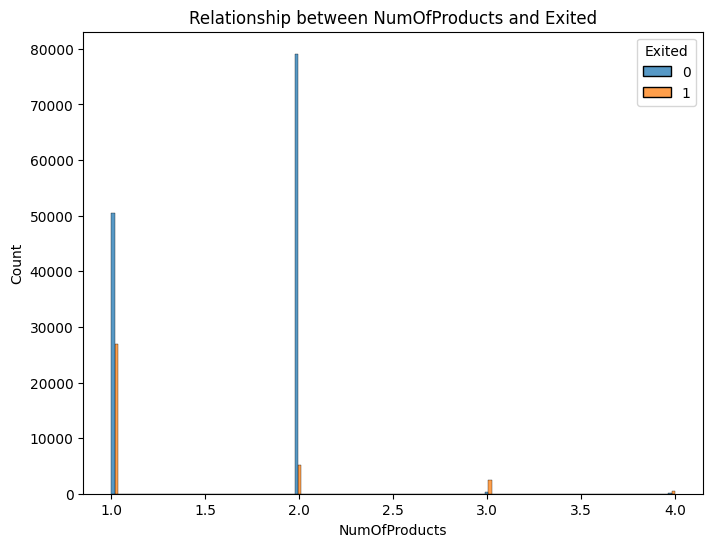

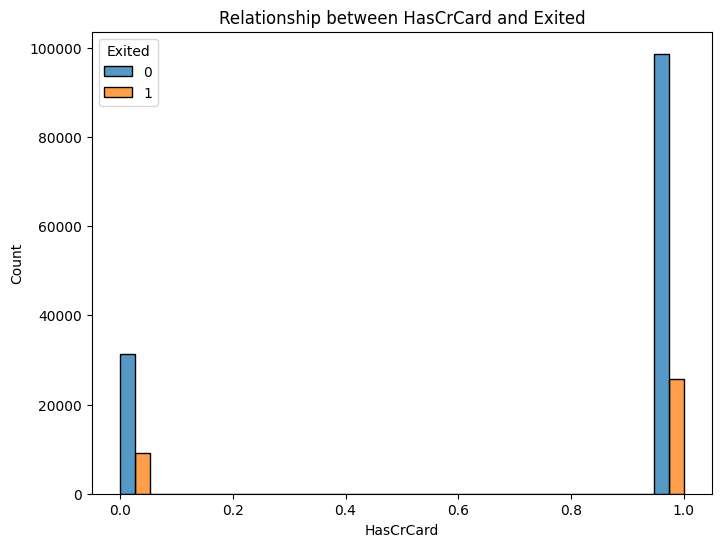

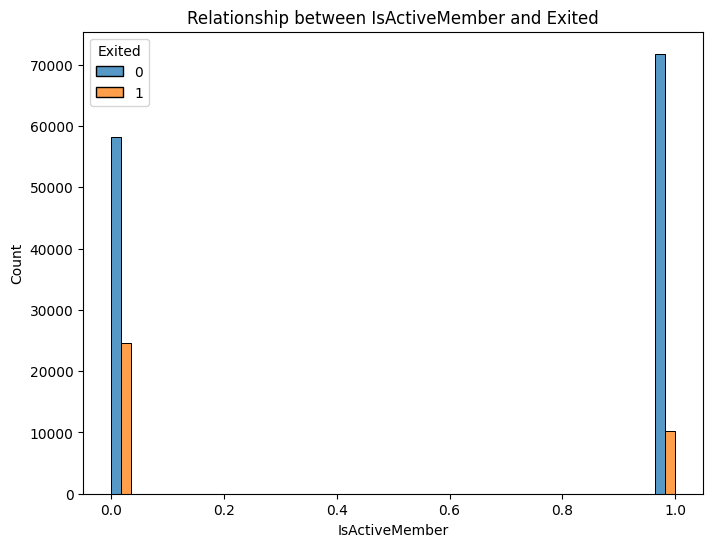

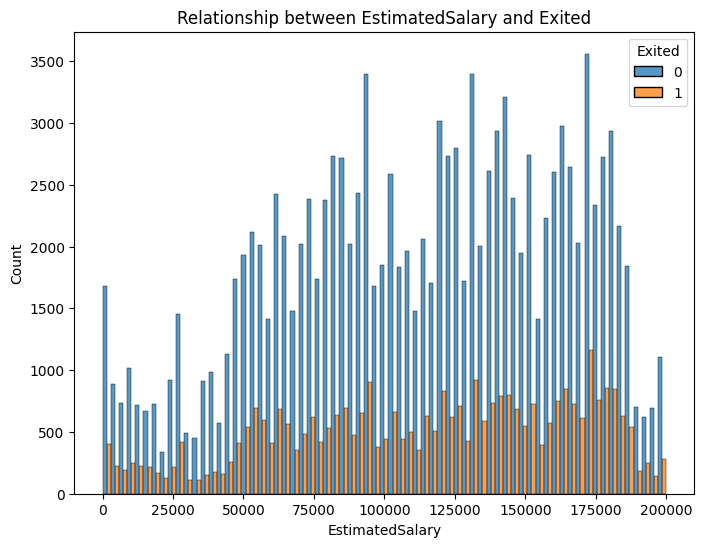

In [ ]:

# Create histograms for the relationship between each column and 'Exited'
for column in train.columns:
  if column != 'Exited':
    plt.figure(figsize=(8, 6))
    sns.histplot(x=column, hue='Exited', data=train, multiple='dodge')
    plt.title(f'Relationship between {column} and Exited')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

france is The biggest country where the customer resides .
most customers have card .

## Define custom colors for each geography category

Germany has the highest average balance among the different geography categories.

##Boxplot and KDE

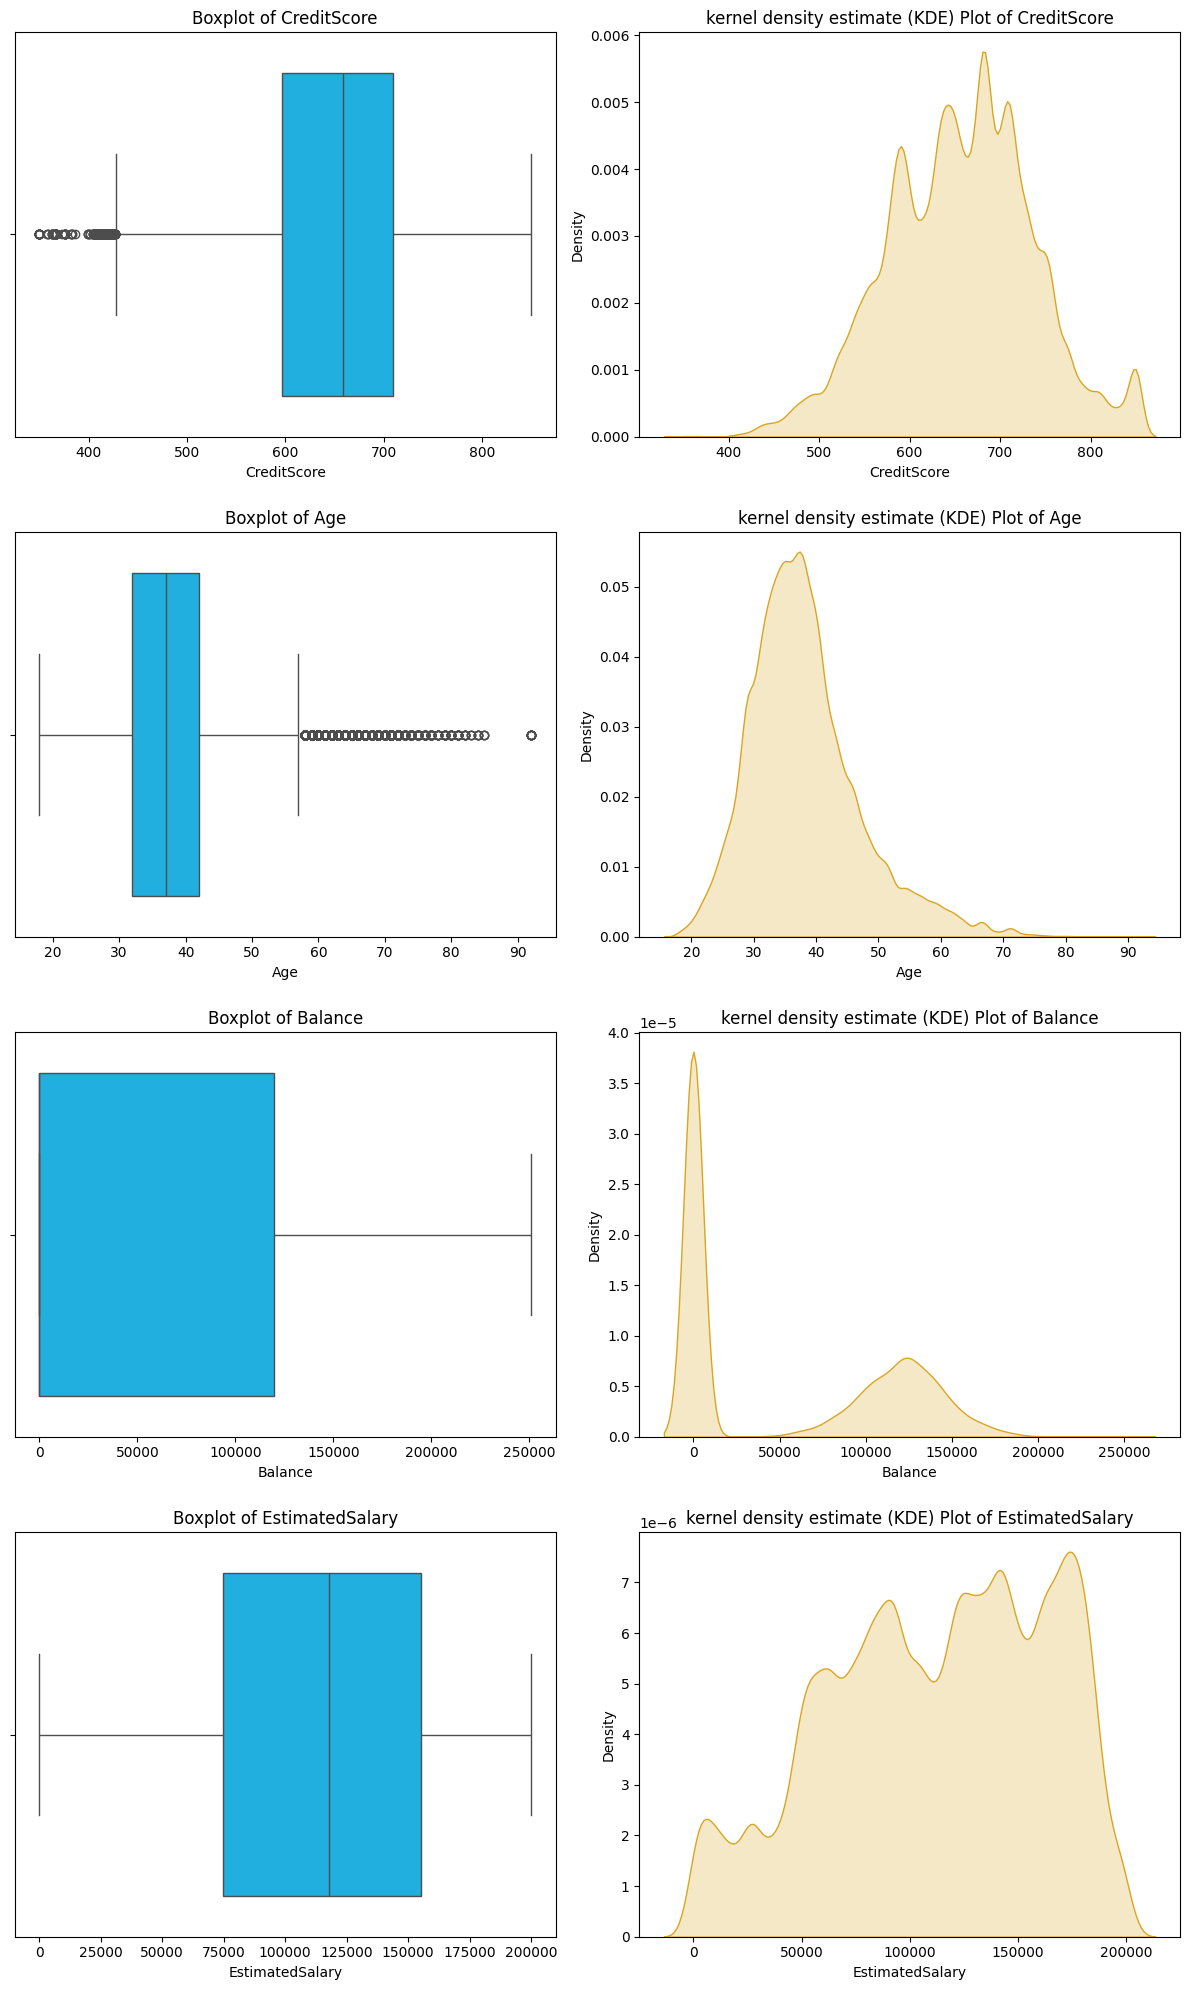

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out continuous columns
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Define the number of rows and columns for subplots
num_rows = len(continuous_vars)
num_cols = 2  # Two plots for each column (box plot and KDE plot)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over each continuous variable and create box plots and KDE plots
for i, column in enumerate(continuous_vars):
    # Box plot
    sns.boxplot(x=train[column], ax=axes[i, 0], color='DeepSkyBlue')
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)

    # KDE plot
    sns.kdeplot(data=train[column], ax=axes[i, 1], color='Goldenrod', fill=True)
    axes[i, 1].set_title(f'kernel density estimate (KDE) Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


Box plots provide a visual representation of the data distribution, making it easier to identify patterns and draw meaningful insights.
Data points outside the whiskers are considered outliers.

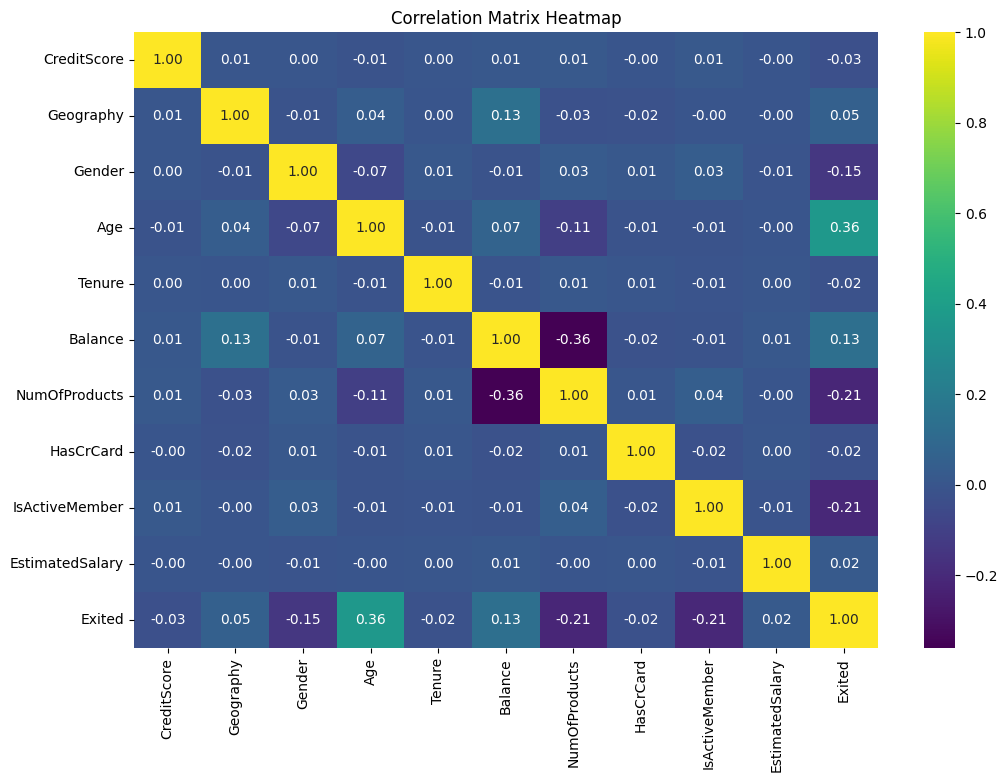

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


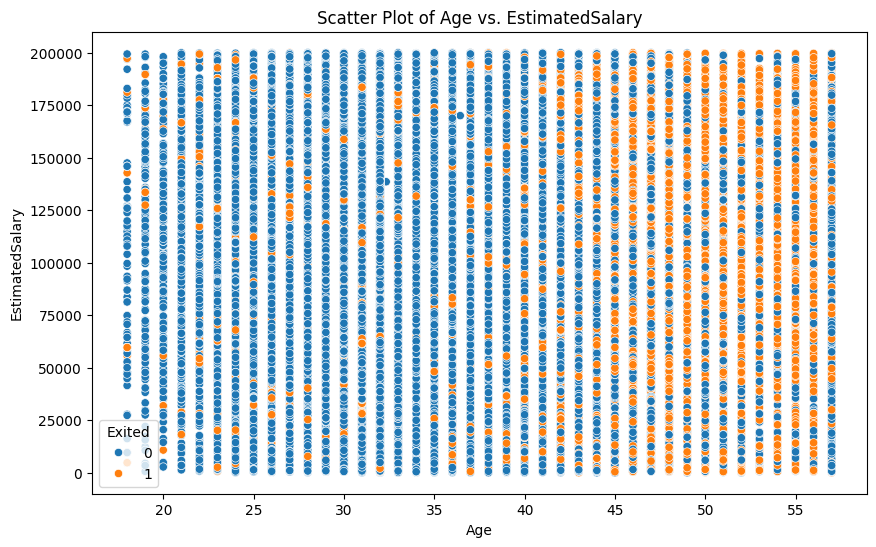

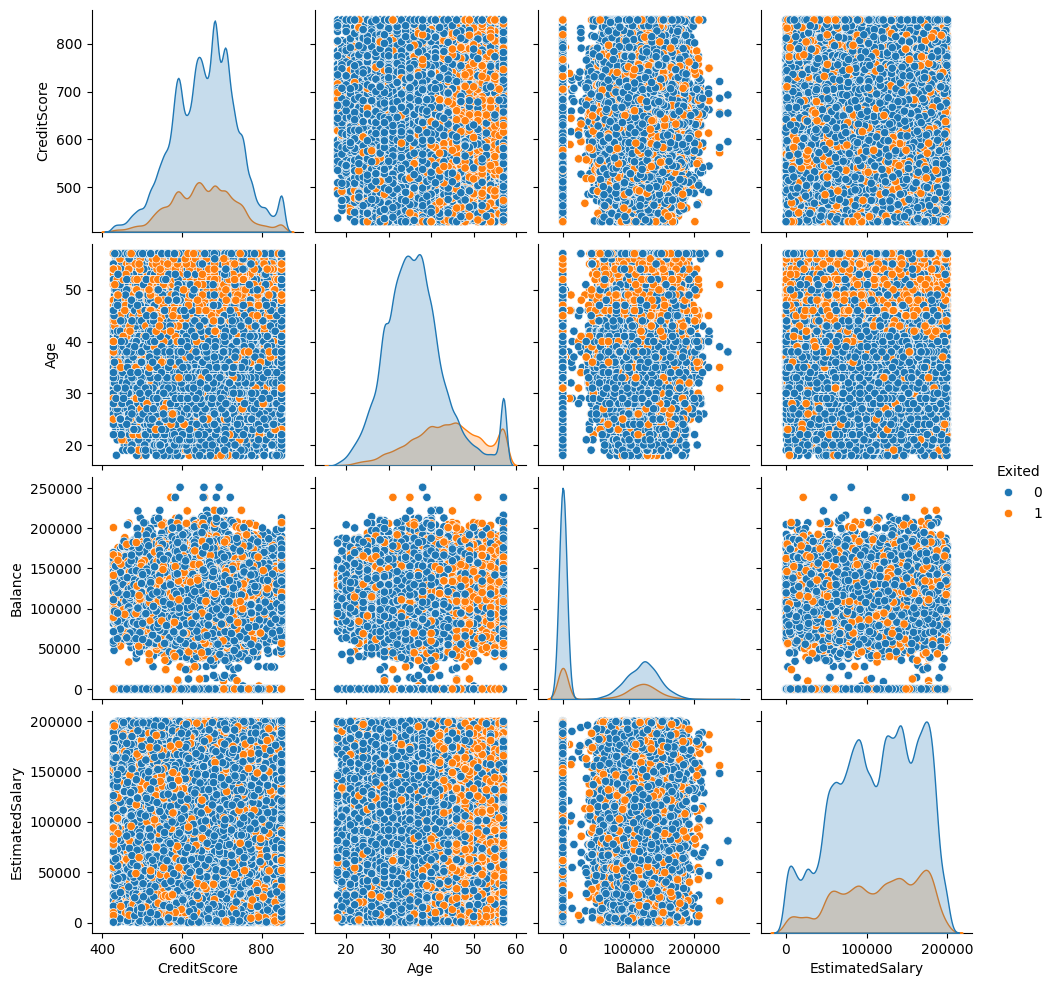

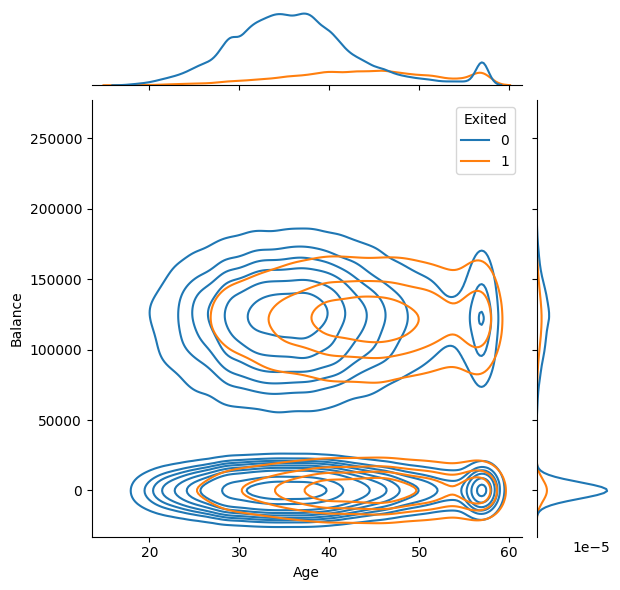

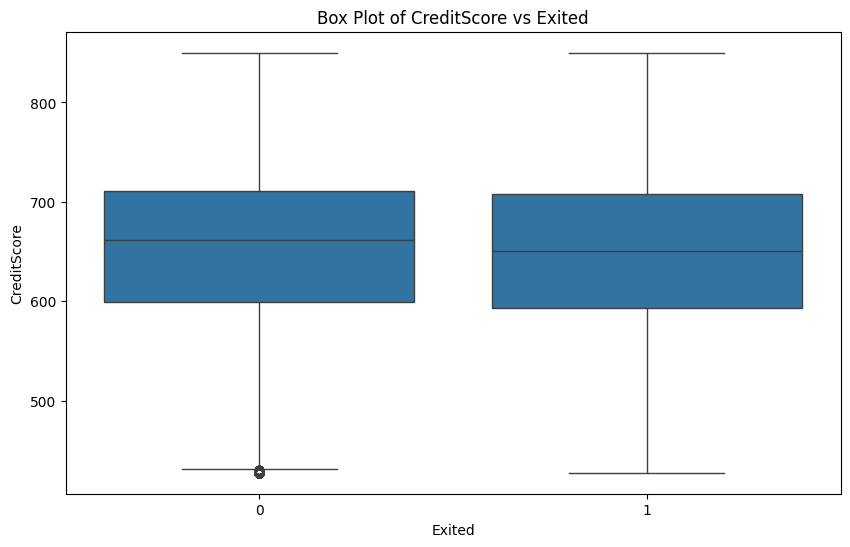

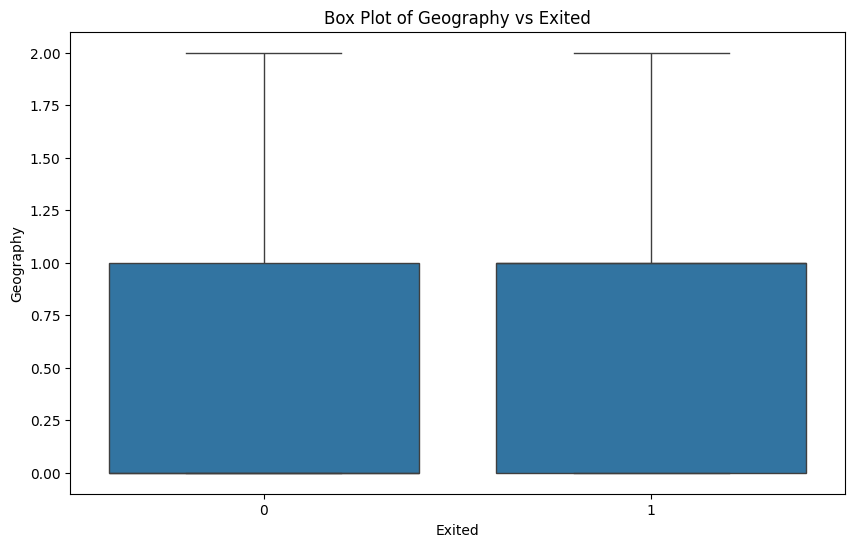

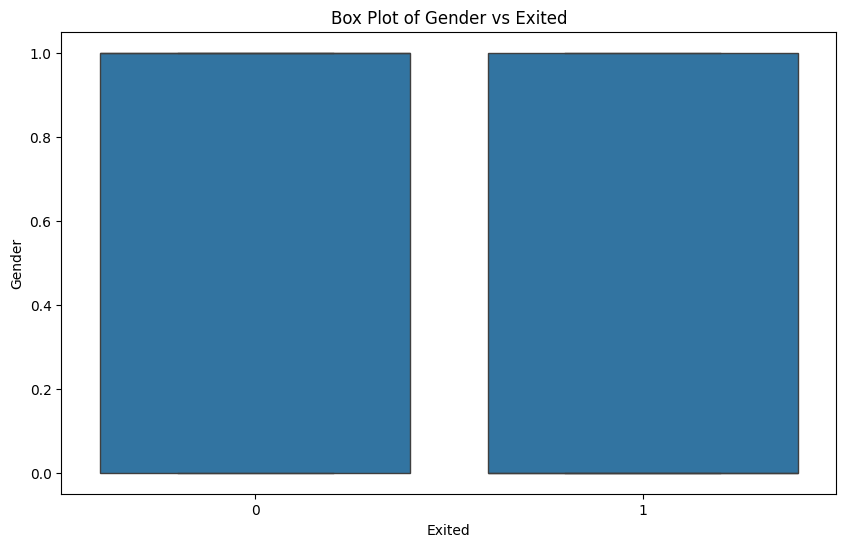

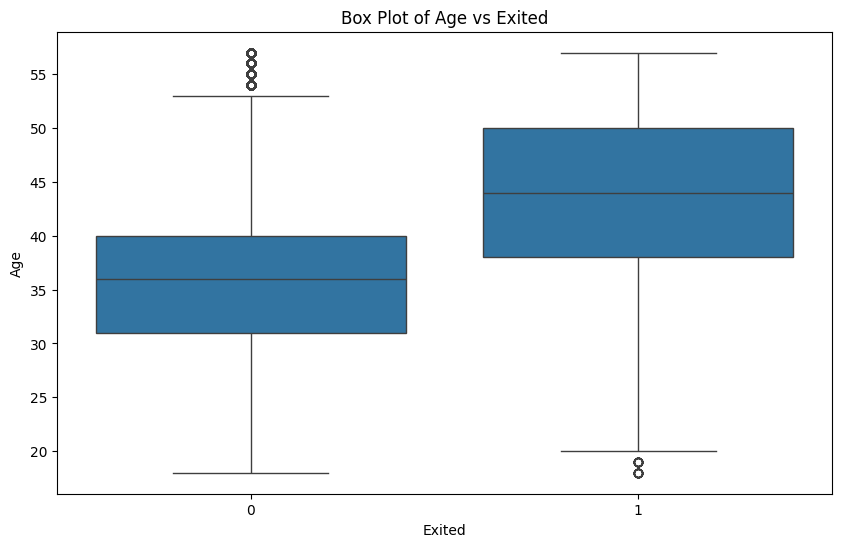

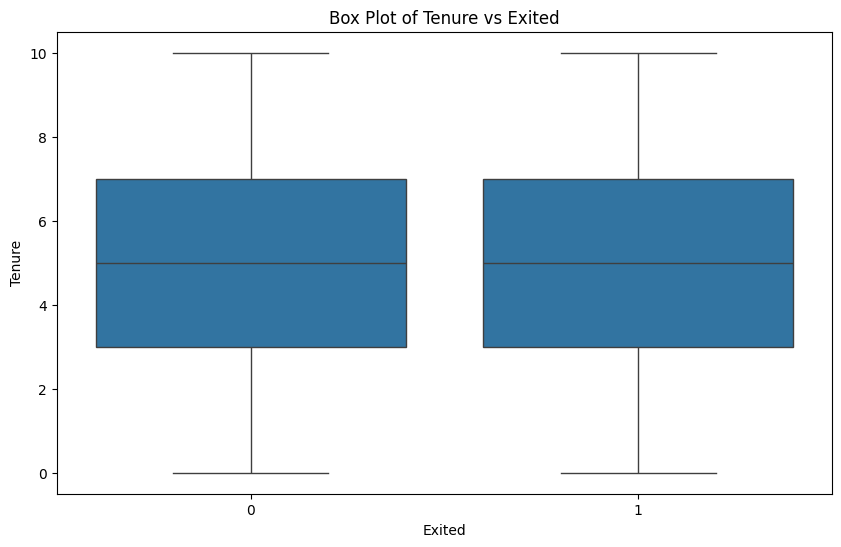

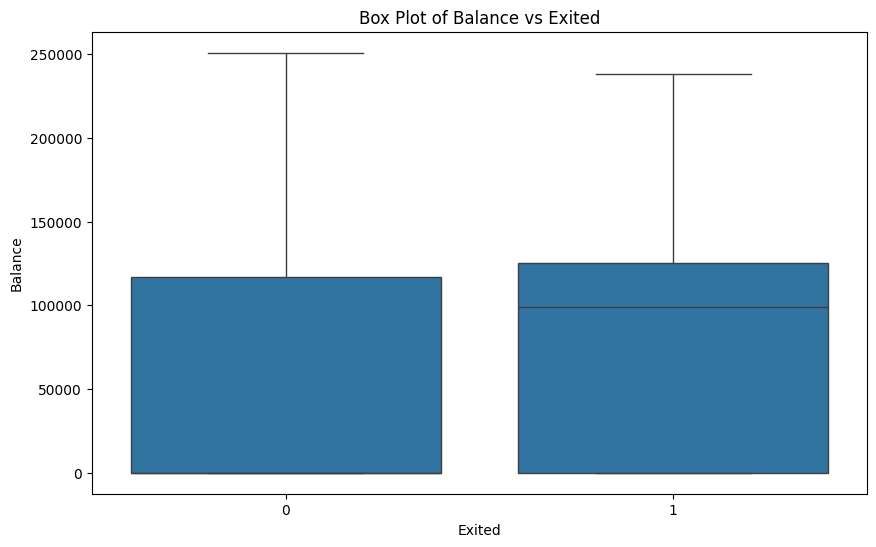

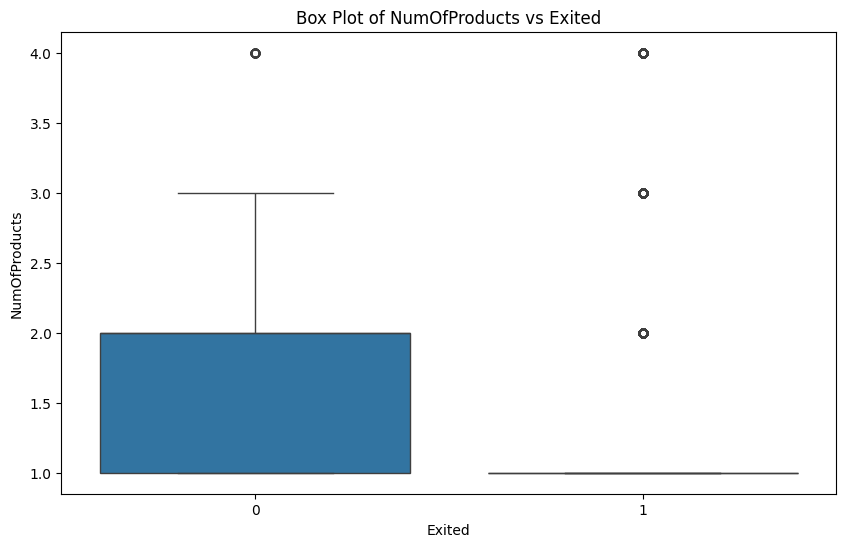

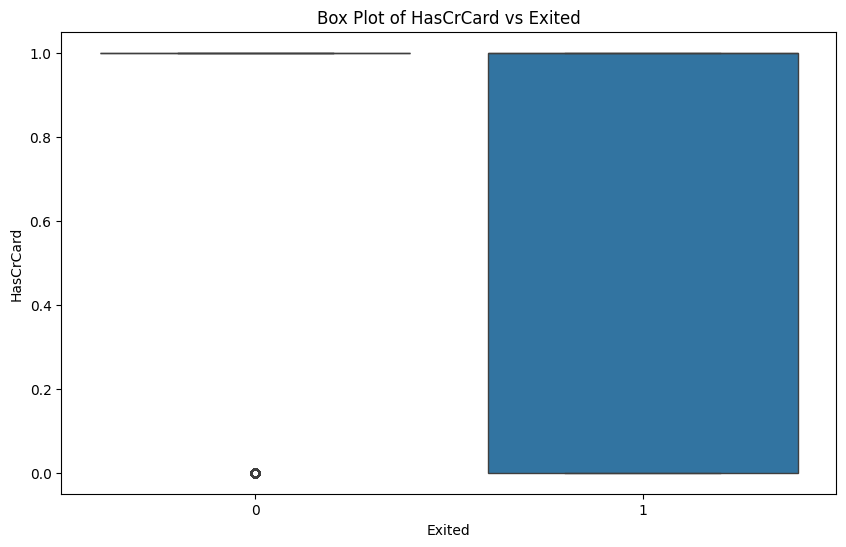

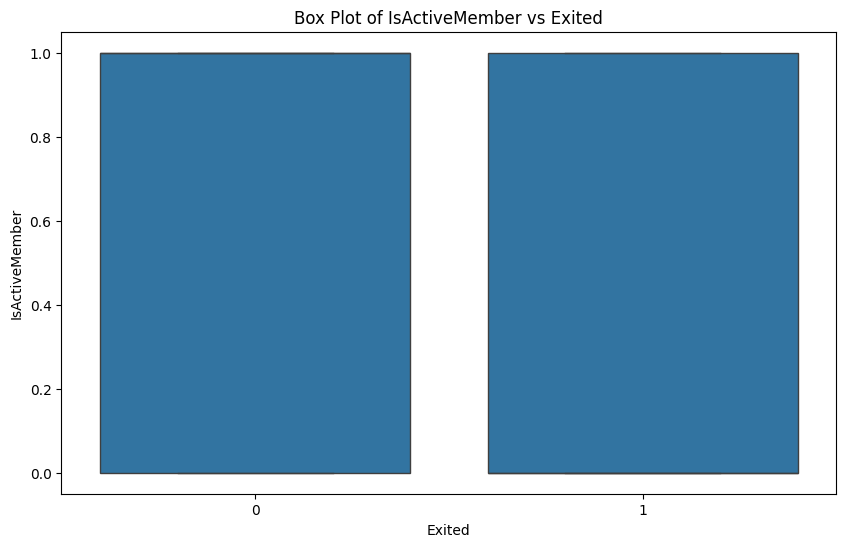

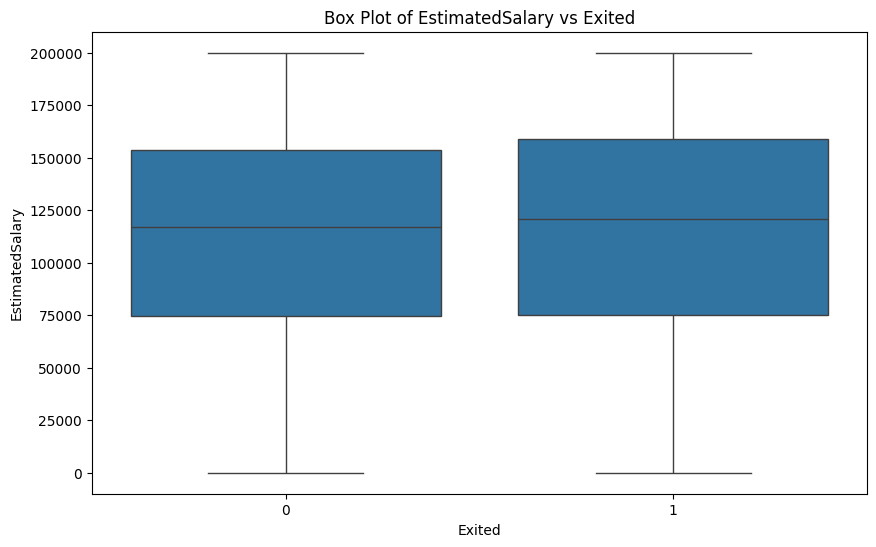

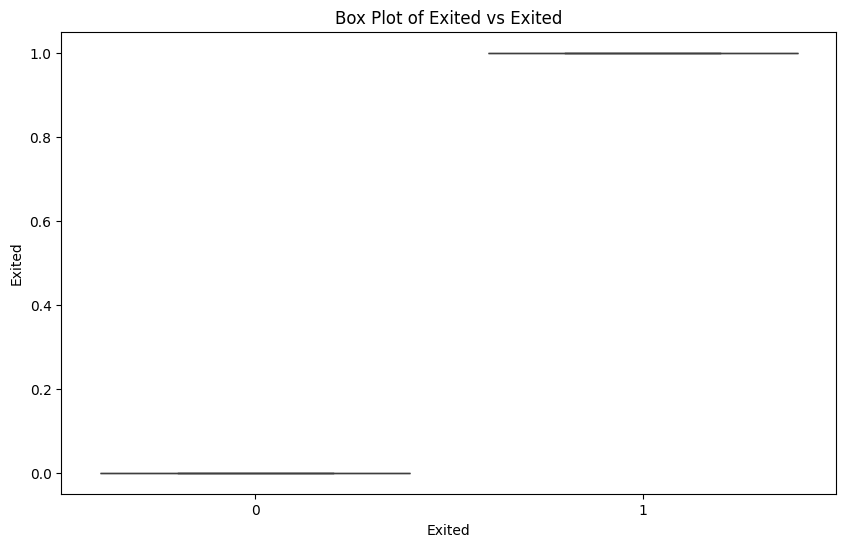

In [ ]:

# Correlation matrix heatmap
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter plot for potentially related variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Exited', data=train)
plt.title('Scatter Plot of Age vs. EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

# Pair plot for a subset of variables
subset_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(train[subset_vars], hue='Exited', diag_kind='kde')
plt.show()

# Joint plot for specific variables
sns.jointplot(x='Age', y='Balance', data=train, kind='kde', hue='Exited')
plt.show()


# Analyze the relationship between 'Exited' and other variables
for column in train.columns:
    if train[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Exited', data=train)
        plt.title(f'Count Plot of {column} vs Exited')
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Exited', y=column, data=train)
        plt.title(f'Box Plot of {column} vs Exited')
        plt.show()

#preprocessing

##Calculate percentage of outliers using IQR method

In [ ]:
# Function to calculate percentage of outliers using IQR method
def percentage_outliers(data_series):
    # Calculate the first and third quartiles
    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]

    # Calculate the percentage of outliers
    percentage = (len(outliers) / len(data_series)) * 100

    return percentage
# Dictionary to store the percentage of outliers for each continuous variable
outliers_percentage = {}

# Iterate over each continuous variable and calculate the percentage of outliers
for column in continuous_vars:
    outliers_percentage[column] = percentage_outliers(train[column])

# Print the percentage of outliers for each column
for column, percentage in outliers_percentage.items():
    print(f'Percentage of outliers in {column}: {percentage:.2f}%')

Percentage of outliers in CreditScore: 0.15%
Percentage of outliers in Age: 3.87%
Percentage of outliers in Balance: 0.00%
Percentage of outliers in EstimatedSalary: 0.00%


##Replace outliers with lower_bound and upper_bound

In [ ]:
# Function to replace outliers with lower_bound and upper_bound
def replace_outliers(data_series):
    # Calculate the first and third quartiles
    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with lower_bound and upper_bound
    data_series[data_series < lower_bound] = lower_bound
    data_series[data_series > upper_bound] = upper_bound

    return data_series
# Iterate over each continuous variable and replace outliers
for column in continuous_vars:
    train[column] = replace_outliers(train[column])

<ipython-input-47-1d9281736926>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_series[data_series < lower_bound] = lower_bound
<ipython-input-47-1d9281736926>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '427.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_series[data_series < lower_bound] = lower_bound
<ipython-input-47-1d9281736926>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_series[data_series < lower_bound] = lower_bound
<ipython-input-47-1d9281736926>:16: Settin

In [ ]:
# Function to calculate percentage of outliers using IQR method
def percentage_outliers0(data_series0):
    # Calculate the first and third quartiles
    Q10 = np.percentile(data_series0, 25)
    Q30 = np.percentile(data_series0, 75)

    # Calculate the IQR
    IQR0 = Q30 - Q10

    # Define the lower and upper bounds for outliers
    lower_bound0 = Q10 - 1.5 * IQR0
    upper_bound0 = Q30 + 1.5 * IQR0

    # Count the number of outliers
    outliers0 = data_series0[(data_series0 < lower_bound0) | (data_series0 > upper_bound0)]

    # Calculate the percentage of outliers
    percentage0 = (len(outliers0) / len(data_series0)) * 100

    return percentage0
# Dictionary to store the percentage of outliers for each continuous variable
outliers_percentage0 = {}

# Iterate over each continuous variable and calculate the percentage of outliers
for column in continuous_vars:
    outliers_percentage0[column] = percentage_outliers0(train[column])

# Print the percentage of outliers for each column
for column, percentage0 in outliers_percentage0.items():
    print(f'Percentage of outliers in {column}: {percentage0:.2f}%')

Percentage of outliers in CreditScore: 0.00%
Percentage of outliers in Age: 0.00%
Percentage of outliers in Balance: 0.00%
Percentage of outliers in EstimatedSalary: 0.00%


This is after modification (replacment).. proves that there is no outliers

In [ ]:
print(train)

        CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0             668.0    France    Male  33.0       3       0.00              2   
1             627.0    France    Male  33.0       1       0.00              2   
2             678.0    France    Male  40.0      10       0.00              2   
3             581.0    France    Male  34.0       2  148882.54              1   
4             716.0     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029        667.0     Spain  Female  33.0       2       0.00              1   
165030        792.0    France    Male  35.0       3       0.00              1   
165031        565.0    France    Male  31.0       5       0.00              1   
165032        554.0     Spain  Female  30.0       7  161533.00              1   
165033        850.0    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActive

In [ ]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000
mean,656.502095,37.881911,5.020599,55481.138955,1.554420,0.753916,0.497693,112579.798396,0.211684
std,79.986256,8.179442,2.806237,62819.233625,0.547171,0.430730,0.499996,50290.229424,0.408503
min,427.500000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74639.870000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,850.000000,57.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns and encode them
for column in train.columns:
  if train[column].dtype == object:
    train[column] = le.fit_transform(train[column])
    test[column] = le.transform(test[column])

# Print the encoded DataFrame
print(train)
test

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0             668.0          0       1  33.0       3       0.00   
1             627.0          0       1  33.0       1       0.00   
2             678.0          0       1  40.0      10       0.00   
3             581.0          0       1  34.0       2  148882.54   
4             716.0          2       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029        667.0          2       0  33.0       2       0.00   
165030        792.0          0       1  35.0       3       0.00   
165031        565.0          0       1  31.0       5       0.00   
165032        554.0          2       0  30.0       7  161533.00   
165033        850.0          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                   2        1.0             0.0        181449.97       0  
1                   2        1.0           

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


#LabelEncoder and StandardScaler in test dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables into numerical using Label Encoding


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_features)


In [ ]:
# data palanced
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.Exited==0]
df_minority = train[train.Exited==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Exited.value_counts())

# Replace the original train data with the balanced data
train = df_upsampled

Exited
0    130002
1    130002
Name: count, dtype: int64


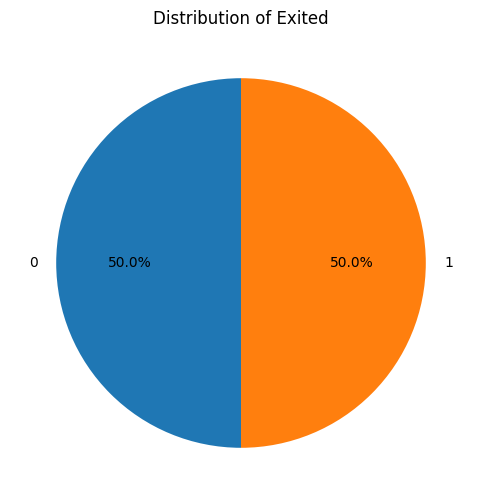

In [ ]:
# prompt: generate Exited pie chart

# Assuming 'train' DataFrame is already defined and contains the 'Exited' column

# Create a pie chart for 'Exited'
status_counts = train['Exited'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Exited')
plt.show()

#Scale Data

In [ ]:
test_data_scaled = pd.DataFrame(test_data_scaled)
test_data_scaled

,0,1,2,3,4,5,6,7,8,9
0,-0.878176,-0.789204,-1.135026,-1.706504,-1.067887,-0.881274,0.820030,-1.746219,1.009580,0.967874
1,0.329567,-0.789204,-1.135026,0.888990,-1.067887,-0.881274,-1.015806,0.572666,-0.990511,-0.790939
2,-0.006609,-0.789204,-1.135026,-0.465181,0.713922,-0.881274,0.820030,0.572666,-0.990511,0.528413
3,0.304665,-0.789204,0.881037,-0.239486,1.070284,-0.881274,-1.015806,0.572666,-0.990511,0.032150
4,1.188684,0.437823,0.881037,-0.013791,1.783008,1.050038,-1.015806,0.572666,-0.990511,0.539331
...,...,...,...,...,...,...,...,...,...,...
110018,-1.077392,1.664850,0.881037,-1.029419,0.713922,0.967796,-1.015806,0.572666,1.009580,0.711510
110019,-1.015137,-0.789204,-1.135026,-0.239486,-0.355164,1.954171,-1.015806,0.572666,1.009580,-1.394946
110020,0.690645,-0.789204,0.881037,-0.803724,-1.067887,-0.881274,0.820030,0.572666,-0.990511,-1.909981
110021,0.653292,-0.789204,-1.135026,-0.690876,-0.711526,-0.881274,-1.015806,0.572666,1.009580,0.924908


#Make a modle

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target variable
X = train.drop(columns=['Exited'])
y = train['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")

    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Training Decision Tree...
Accuracy of Decision Tree: 0.916443914540105
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     25927
           1       0.87      0.98      0.92     26074

    accuracy                           0.92     52001
   macro avg       0.92      0.92      0.92     52001
weighted avg       0.92      0.92      0.92     52001

Confusion Matrix for Decision Tree:
[[22187  3740]
 [  605 25469]]


Training Naive Bayes...
Accuracy of Naive Bayes: 0.7677544662602642
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     25927
           1       0.77      0.77      0.77     26074

    accuracy                           0.77     52001
   macro avg       0.77      0.77      0.77     52001
weighted avg       0.77      0.77      0.77     52001

Confusion Matrix for Naive Bayes:
[[19965  5962]
 [ 6115 1

In [ ]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627.0,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678.0,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581.0,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716.0,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf}")

print(f"Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print(f"Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# You can further analyze the model's performance by looking at the feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

# Make predictions on the actual test data
test_predictions = rf_classifier.predict(test_data_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'Exited': test_predictions})

# Save the submission to a CSV file
submission_df.to_csv('submission.csv', index=False)

Accuracy of Random Forest: 0.9447126016807369
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     25927
           1       0.92      0.98      0.95     26074

    accuracy                           0.94     52001
   macro avg       0.95      0.94      0.94     52001
weighted avg       0.95      0.94      0.94     52001

Confusion Matrix for Random Forest:
[[23552  2375]
 [  500 25574]]
           Feature  Importance
3              Age    0.224174
6    NumOfProducts    0.176736
9  EstimatedSalary    0.157667
0      CreditScore    0.147021
5          Balance    0.111777
4           Tenure    0.072492
8   IsActiveMember    0.048726
1        Geography    0.030427
2           Gender    0.019253
7        HasCrCard    0.011726


In [ ]:
# prompt: make file submission.csv not integer but like this id,Exited
# 165034,0.023774149875450543
# 165035,0.7952707467800293
# 165036,0.029495748882685507

# Make predictions on the actual test data
test_predictions = rf_classifier.predict_proba(test_data_scaled)[:, 1]

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'Exited': test_predictions})

# Save the submission to a CSV file
submission_df.to_csv('submission1.csv', index=False)

Confusion Matrix:
[[21517  4410]
 [ 4494 21580]]


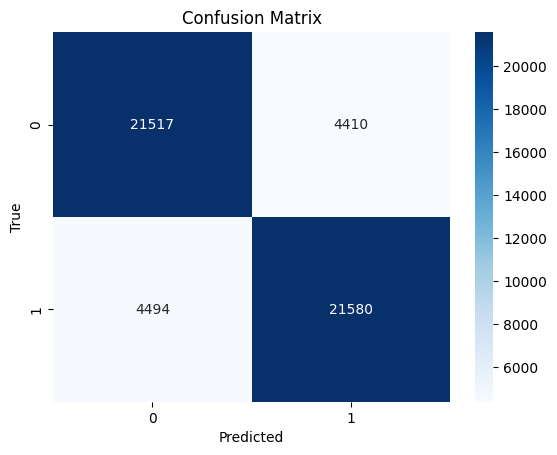

In [ ]:

# Assuming y_test and y_pred are already defined from your model's predictions

from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can also visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Model 2

In [ ]:
# Separate numerical and categorical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Remove 'Exited' column from numerical_cols if present
if 'Exited' in numerical_cols:
    numerical_cols.remove('Exited')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
import numpy as np

# Log transformation function
log_transform_func = FunctionTransformer(np.log1p)

# Define transformations for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('log', log_transform_func, ['Balance', 'EstimatedSalary'])
    ])

# Define final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Split data into features and target variable
w = train.drop(columns=['Exited'])
z = train['Exited']

In [ ]:
# Split data into train and test sets
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size=0.2, random_state=42)

In [ ]:
w_train.shape

(208003, 10)

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(w_train, z_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Geography',
                                                   'Gender', 'Age', 'Tenure',
                                                   'Balance', 'NumOfProducts',
                                                   'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Balance',
                                                   'EstimatedSalary'])]))])

In [ ]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627.0,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678.0,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581.0,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716.0,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
# Apply the pipeline transformations on training and testing data
w_train_transformed = pipeline.transform(w_train)
w_test_transformed = pipeline.transform(w_test)

In [ ]:

# Assuming 'train' DataFrame is already defined and contains the 'Exited' column

# Separate majority and minority classes
df_majority = train[train.Exited==0]
df_minority = train[train.Exited==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Exited.value_counts())

# Replace the original train data with the balanced data
train = df_upsampled

Exited
0    130002
1    130002
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define a list of models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Define lists to store evaluation results
auc_scores = []
classification_reports = []

# Iterate over each model
for model in models:
    # Fit the model on the training data
    model.fit(w_train_transformed, z_train)

    # Predict probabilities on the testing data
    z_pred_proba = model.predict_proba(w_test_transformed)[:, 1]

    # Calculate AUC score
    auc = roc_auc_score(z_test, z_pred_proba)
    auc_scores.append(auc)

    # Predict classes on the testing data
    z_pred = model.predict(w_test_transformed)





    # Calculate classification report
    report = classification_report(z_test, z_pred, output_dict=True)
    classification_reports.append(report)

# Print or store the evaluation results
for model, auc, report in zip(models, auc_scores, classification_reports):
    print(f"Model: {type(model).__name__}...")
    print(f"Accuracy of: {type(model).__name__}: {auc}")
    print("Classification Report:")
    print(report)
    # Print confusion matrix
    print(f"Confusion Matrix for {report}:")
    print("\n")


Model: LogisticRegression...
Accuracy of: LogisticRegression: 0.8166922748114253
Classification Report:
{'0': {'precision': 0.7394986707178124, 'recall': 0.7509931731399699, 'f1-score': 0.7452015997856747, 'support': 25927.0}, '1': {'precision': 0.7485099918195629, 'recall': 0.7369410140369717, 'f1-score': 0.7426804522176056, 'support': 26074.0}, 'accuracy': 0.7439472317840041, 'macro avg': {'precision': 0.7440043312686877, 'recall': 0.7439670935884708, 'f1-score': 0.7439410260016401, 'support': 52001.0}, 'weighted avg': {'precision': 0.7440170681795352, 'recall': 0.7439472317840041, 'f1-score': 0.7439374625250482, 'support': 52001.0}}
Confusion Matrix for {'0': {'precision': 0.7394986707178124, 'recall': 0.7509931731399699, 'f1-score': 0.7452015997856747, 'support': 25927.0}, '1': {'precision': 0.7485099918195629, 'recall': 0.7369410140369717, 'f1-score': 0.7426804522176056, 'support': 26074.0}, 'accuracy': 0.7439472317840041, 'macro avg': {'precision': 0.7440043312686877, 'recall': 0

From the previous model we take the highest model accuracy = 99% (RandomForestClassifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target variable

# Initialize logistic regression model
log_reg = RandomForestClassifier()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
predictions = log_reg.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc}')


ROC AUC Score: 0.9900035072599962


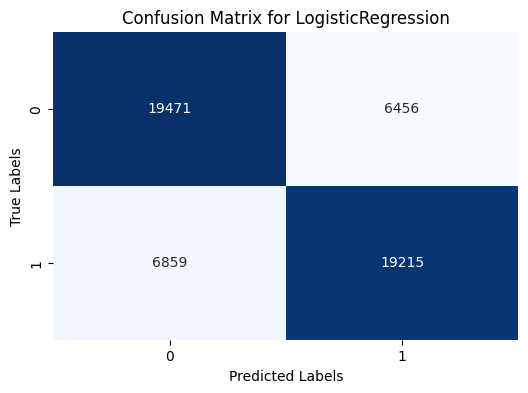

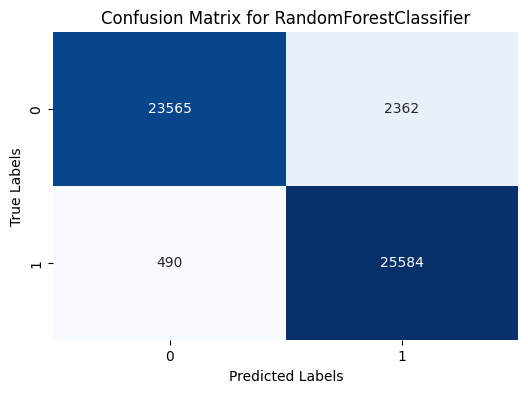

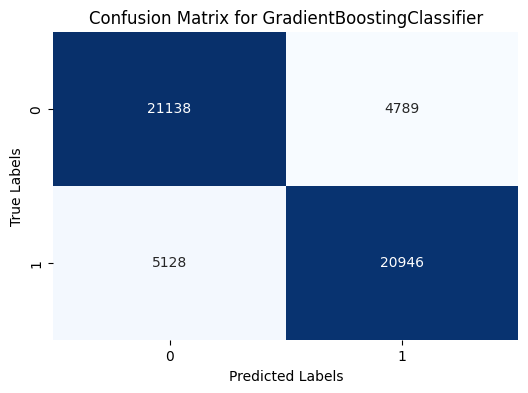

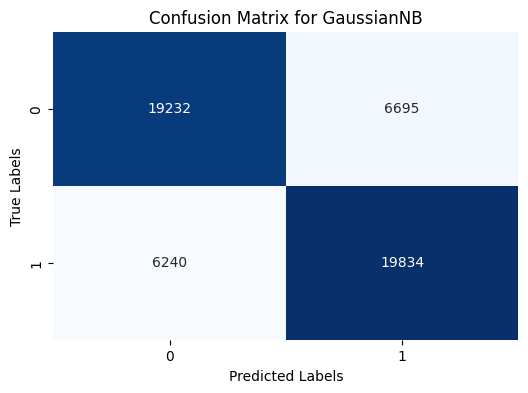

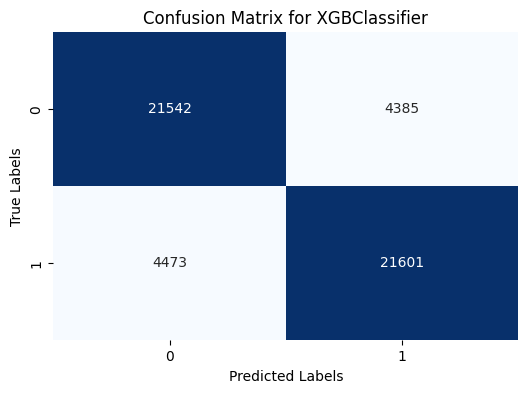

Model: LogisticRegression
AUC Score: 0.8166922748114253
Classification Report:
{'0': {'precision': 0.7394986707178124, 'recall': 0.7509931731399699, 'f1-score': 0.7452015997856747, 'support': 25927.0}, '1': {'precision': 0.7485099918195629, 'recall': 0.7369410140369717, 'f1-score': 0.7426804522176056, 'support': 26074.0}, 'accuracy': 0.7439472317840041, 'macro avg': {'precision': 0.7440043312686877, 'recall': 0.7439670935884708, 'f1-score': 0.7439410260016401, 'support': 52001.0}, 'weighted avg': {'precision': 0.7440170681795352, 'recall': 0.7439472317840041, 'f1-score': 0.7439374625250482, 'support': 52001.0}}
Model: RandomForestClassifier
AUC Score: 0.9905199767300583
Classification Report:
{'0': {'precision': 0.9796300145499897, 'recall': 0.9088980599375168, 'f1-score': 0.9429394582049537, 'support': 25927.0}, '1': {'precision': 0.9154798540041509, 'recall': 0.9812073329753778, 'f1-score': 0.9472047389855609, 'support': 26074.0}, 'accuracy': 0.945154900867291, 'macro avg': {'precisi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define a list of models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Define lists to store evaluation results
auc_scores = []
classification_reports = []

# Iterate over each model
for model in models:
    # Fit the model on the training data
    model.fit(w_train_transformed, z_train)

    # Predict probabilities on the testing data
    z_pred_proba = model.predict_proba(w_test_transformed)[:, 1]

    # Calculate AUC score
    auc = roc_auc_score(z_test, z_pred_proba)
    auc_scores.append(auc)

    # Predict classes on the testing data
    z_pred = model.predict(w_test_transformed)

    # Calculate classification report
    report = classification_report(z_test, z_pred, output_dict=True)
    classification_reports.append(report)

    # Compute confusion matrix
    cm = confusion_matrix(z_test, z_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Print or store the evaluation results
for model, auc, report in zip(models, auc_scores, classification_reports):
    print(f"Model: {type(model).__name__}")
    print(f"AUC Score: {auc}")
    print("Classification Report:")
    print(report)


# Submission

In [ ]:
y_pred = log_reg.predict_proba(test_data_scaled)


In [ ]:
submission = pd.DataFrame({'id':test['id'], 'Exited':y_pred[:, 1]})
submission.to_csv('submission3.csv',index=False)

In [ ]:
# prompt: generate svm model

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', probability=True)  # You can experiment with different kernels (linear, poly, etc.)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm}")

print(f"Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print(f"Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

# You can further tune the hyperparameters of the SVM model for better performance
# using techniques like GridSearchCV

# Make predictions on the actual test data for submission
test_predictions_svm = svm_classifier.predict_proba(test_data_scaled)[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame({'id':test['id'], 'Exited':y_pred[:, 1]})
submission.to_csv('submission4.csv',index=False)

Accuracy of SVM: 0.8044614379587288
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     26053
           1       0.81      0.80      0.80     25993

    accuracy                           0.80     52046
   macro avg       0.80      0.80      0.80     52046
weighted avg       0.80      0.80      0.80     52046

Confusion Matrix for SVM:
[[21124  4929]
 [ 5248 20745]]


#Part 2

In [ ]:
# Separate numerical and categorical columns
numerical_cols4 = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols4 = train.select_dtypes(include=['object']).columns.tolist()

# Remove 'Exited' column from numerical_cols if present
if 'Exited' in numerical_cols4:
    numerical_cols4.remove('Exited')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
import numpy as np

# Log transformation function
log_transform_func4 = FunctionTransformer(np.log1p)

# Define transformations for numerical and categorical columns
numerical_transformer4 = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer4 = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer4, numerical_cols),
        ('cat', categorical_transformer4, categorical_cols),
        ('log', log_transform_func4, ['Balance', 'EstimatedSalary'])
    ])

# Define final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Split data into features and target variable
C = train.drop(columns=['Exited'])
D = train['Exited']

In [ ]:
# Split data into train and test sets
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=42)

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(C_train, D_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Geography',
                                                   'Gender', 'Age', 'Tenure',
                                                   'Balance', 'NumOfProducts',
                                                   'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Balance',
                                                   'EstimatedSalary'])]))])

In [ ]:
# Apply the pipeline transformations on training and testing data
C_train_transformed = pipeline.transform(C_train)
C_test_transformed = pipeline.transform(C_test)

In [ ]:
train4=train[train['EstimatedSalary'] > 15000]   # take all EstimatedSalary grater than 15000
train4.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.7181 - loss: 0.5440
Epoch 2/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.7965 - loss: 0.4377
Epoch 3/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.7993 - loss: 0.4315
Epoch 4/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.8034 - loss: 0.4261
Epoch 5/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.8050 - loss: 0.4221
Epoch 6/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8073 - loss: 0.4179
Epoch 7/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8056 - loss: 0.4191
Epoch 8/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8094 - loss: 0.4141
Epoch 9/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8105 - loss: 0.4107
Epoch 10/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8145 - loss: 0.4052
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6501/6501 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7419 - loss: 0.5201
Epoch 2/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7911 - loss: 0.4467
Epoch 3/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7969 - loss: 0.4392
Epoch 4/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7976 - loss: 0.4359
Epoch 5/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7983 - loss: 0.4345
Epoch 6/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7980 - loss: 0.4341
Epoch 7/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7997 - loss: 0.4314
Epoch 8/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7987 - loss: 0.4333
Epoch 9/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7983 - loss: 0.4336
Epoch 10/10
6501/6501 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7998 - loss: 0.4309
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
RNN ROC AUC Score: 0.8956960332146

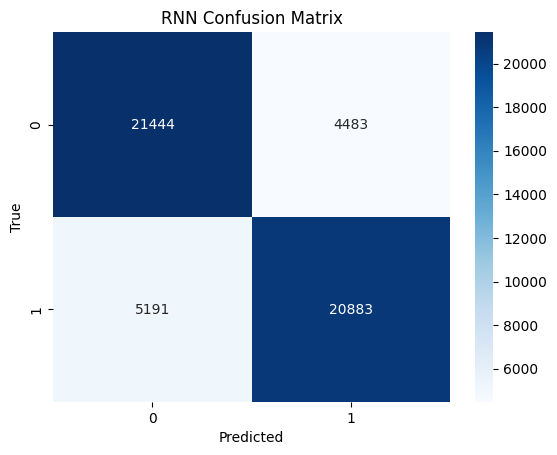

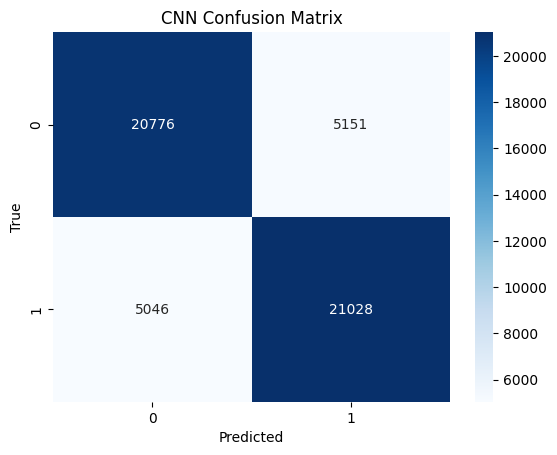

In [ ]:
# prompt: generate deep learning model rnn and cnn to run this data and return  roc_auc_score and confusion matrix graph

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your feature matrix and target variable
# ... (Your data preprocessing code here) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN and RNN
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# RNN Model
rnn_model = Sequential()
rnn_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(LSTM(units=50))
rnn_model.add(Dense(units=1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32)


# Make predictions with RNN
y_pred_rnn_probs = rnn_model.predict(X_test_rnn)
y_pred_rnn = (y_pred_rnn_probs > 0.5).astype(int)

# Make predictions with CNN
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Calculate ROC AUC score for RNN
roc_auc_rnn = roc_auc_score(y_test, y_pred_rnn_probs)
print(f"RNN ROC AUC Score: {roc_auc_rnn}")

# Calculate ROC AUC score for CNN
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn_probs)
print(f"CNN ROC AUC Score: {roc_auc_cnn}")

# Confusion matrix for RNN
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()